# Attempting to Quantify What makes a Soccer Star on Fifa Player's Ratings Dataset

There is almost 18,000 players in this dataset that comes from https://data.world/raghav333/fifa-players and obtained from Kaggle repo https://www.kaggle.com/datasets/rishidamarla/fifa-players-ratings. The original data was scrapped from https://sofifa.com/.


In this project, we will explore a dataset of FIFA players from around the world to answer questions about what makes a soccer star valuable. We will investigate the relationship between player ratings and salaries to determine if there is a correlation. Additionally, we will examine the most common positions played by the players and the least common.
Question to answer:

1. Will need to complete missing data and to drop columns that won't help due to the lack on information/values.
2. Let's have a look at the characteristics of the players: Age, Nationality top 10, Overall Rating vs Potential and Value vs Wage in EUR.
3. ¿Is there a rellation between overall rating and the wage?
4. What are the most common positions played by the players, and which positions are the least common?
5. Can we have a trained ML algoritm to predict wich will be the Overal rating of a player according to the data base.


---
In this notebook:


Methodology: We will use descriptive statistics and data visualization techniques to analyze the data. We will explore the relationship between player salaries and ratings using scatter plots and correlation analysis. We will also use bar charts and frequency tables to examine the most common and least common player positions.

Conclusion: By analyzing the FIFA players' data, we will gain insights into what makes a soccer star valuable. We will be able to determine which players and teams are the highest paid and highest rated. Additionally, we will have a better understanding of the most and least common positions played by the players in the dataset.

---


In [1]:
# This Python 3 environment 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure #to plot the graphs
import seaborn as sb
import io
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [4]:

# this code is used to read a cleaned FIFA players' dataset in CSV format and store it as a Pandas DataFrame for further data analysis and processing.
df_fifa = pd.read_csv('./fifa_cleaned.csv')
print("Data cargada")

Data cargada


In [8]:
#to confirm DB is UL correctly
pd.set_option('display.max_columns', None)
df_fifa.head(3)

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,release_clause_euro,club_team,club_rating,club_position,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,tags,traits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Medium/ Low,Messi,226500000.0,FC Barcelona,86.0,RW,10.0,2004-07-01,2021,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,"#Dribbler,#Distance Shooter,#Crosser,#FK Speci...","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,High/ Medium,Lean,133800000.0,Tottenham Hotspur,83.0,LCM,23.0,2013-08-30,2020,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,"#Playmaker ,#Crosser,#FK Specialist,#Complete...","Flair,Long Shot Taker (CPU AI Only),Playmaker ...",79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,High/ Medium,Normal,144200000.0,Manchester United,82.0,LCM,6.0,2016-08-09,2021,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,"#Dribbler,#Playmaker ,#Strength,#Complete Mid...","Flair,Long Passer (CPU AI Only),Long Shot Take...",81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3


In [4]:
#We will explore the DB and see the Null values it has
df_fifa.info()
#df_fifa.describe()
#df_fifa.shape
#df_fifa.columns
#df_fifa.value_counts()
df_fifa.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

id               0
name             0
full_name        0
birth_date       0
age              0
              ... 
LB            2065
LCB           2065
CB            2065
RCB           2065
RB            2065
Length: 92, dtype: int64

In [ ]:
#We are dropping the most uncompleted labels in order to have the most accurate data (00857/15889/17954) has/min/total values
columns_to_drop = [col for col in df_fifa.columns if col.startswith('national_') or col in ['tags', 'traits']]
df_working = df_fifa.drop(columns=columns_to_drop)

## incompleted 15889/17954
#player_positions 

## incompleted 17699/17954
# player_labels_wage

In [ ]:
#This line fills missing values in columns with object data type with the most frequent value in that column. 
# mode() finds the most frequent value and iloc[0] returns the first value in the resulting Series.
df_working = df_working.fillna(df_working.select_dtypes(include=['object']).mode().iloc[0])

# These lines calculate the mean of the 'club_jersey_number' and 'club_rating' columns.
mean_club_jersey_number = df_working['club_jersey_number'].mean()
mean_club_rating = df_working['club_rating'].mean()

#These lines fill the missing values in the 'club_jersey_number' and 'club_rating' columns with their respective mean.
df_working['club_jersey_number'] = df_working['club_jersey_number'].fillna(mean_club_jersey_number)
df_working['club_rating'] = df_working['club_rating'].fillna(mean_club_rating)

df_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17954 non-null  float64
 12  wage_euro                      17954 non-null 

Now I want to separate and organize the data in order to work with tables without NULL values. For this purpose, we will use the entire set of 17954 players for whom we have statistical performance values and compare them to how much money the do. We'll need to normalize data.

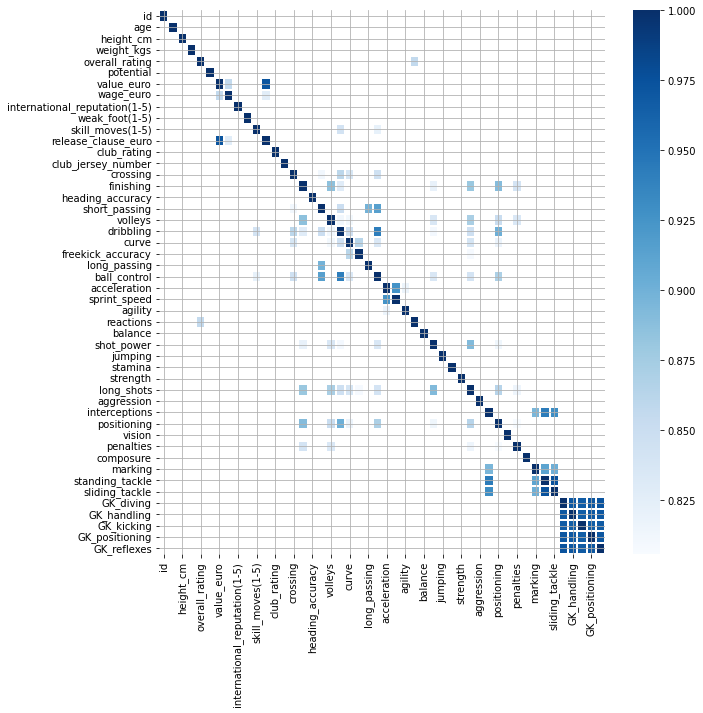

In [ ]:

# Create a new figure with a size of 10x10 inches
plt.figure(figsize=(10,10))

# Calculate the correlation matrix of the dataframe
correlation = df_working.corr()

# Generate a heatmap of the correlation matrix
# Use a mask to hide values below the threshold of 0.8, set the linewidth to 1 and use the Blues colormap
sb.heatmap(correlation, mask = correlation < 0.8, linewidth=1, cmap='Blues')

# Add grid lines to the plot
plt.grid()

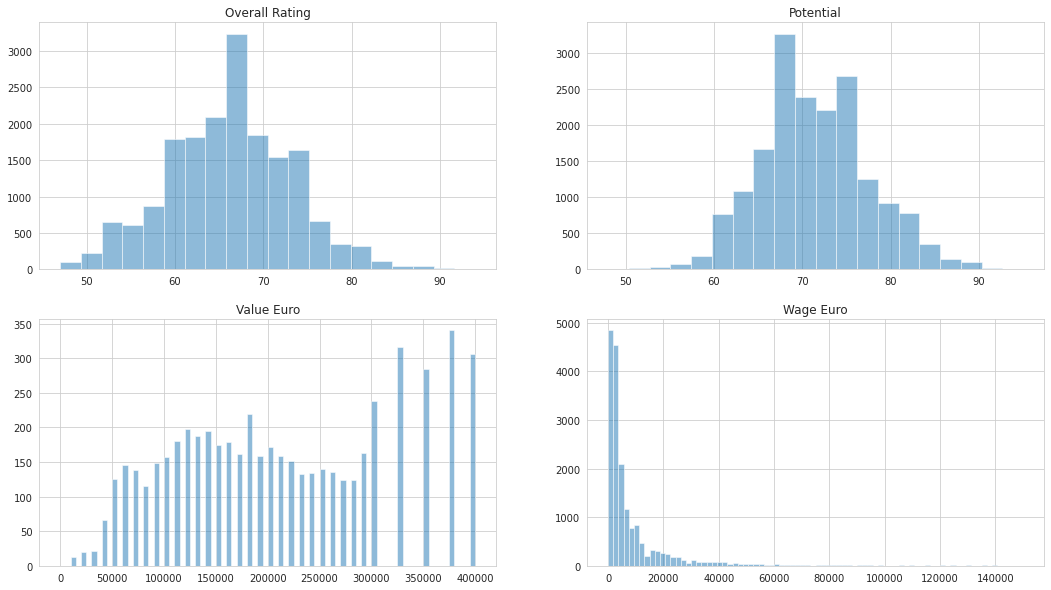

In [ ]:

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2,figsize=(18, 10))

x = range(len(df_working['id']))

ax0.hist(df_working['overall_rating'], bins=20, alpha=0.5)
ax0.set_title('Overall Rating')

ax1.hist(df_working['potential'], bins=20, alpha=0.5)
ax1.set_title('Potential')

ax2.hist(df_working['value_euro'], bins=80, alpha=0.5, range=(0, 400000))
ax2.set_title('Value Euro')

ax3.hist(df_working['wage_euro'], bins=80, alpha=0.5, range=(0, 150000))
ax3.set_title('Wage Euro')
plt.show()


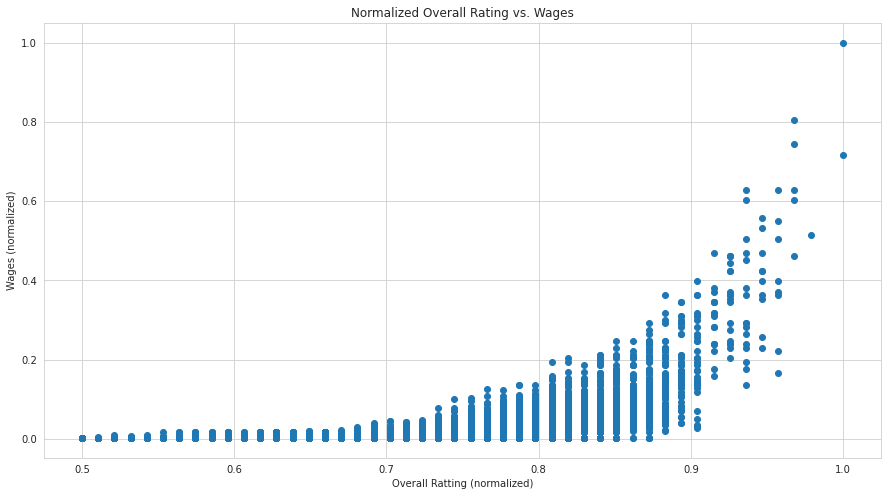

In [ ]:
fig2, ax2 = plt.subplots(figsize=(15,8))

scaling_factor_overall_rating = df_working['overall_rating'].max()  ## set the scaling factor to normalize data
scaling_factor_wage = df_working['wage_euro'].max()  ## set the scaling factor to normalize data

ax2.scatter(df_working['overall_rating']/scaling_factor_overall_rating, df_working['wage_euro']/scaling_factor_wage)

# add labels and title to the plot
ax2.set_xlabel('Overall Ratting (normalized)')
ax2.set_ylabel('Wages (normalized)')
ax2.set_title('Normalized Overall Rating vs. Wages')
plt.show()

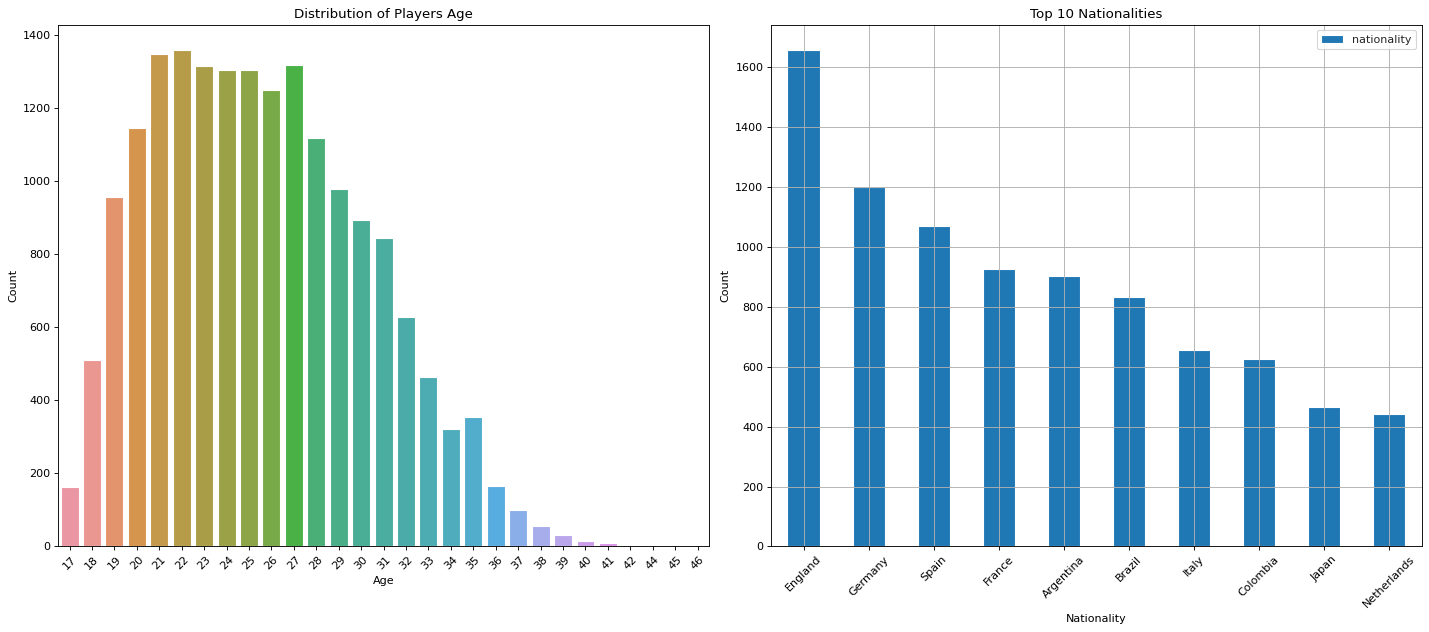

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), dpi=80)

sb.set_style("whitegrid")
sb.countplot(x='age', data=df_working, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Players Age')

count=df_working['nationality'].value_counts()
the_best_10=count[0:10]
the_10=the_best_10.to_frame()
the_10.plot.bar(ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_xlabel('Nationality')
ax2.set_ylabel('Count')
ax2.set_title('Top 10 Nationalities')

plt.tight_layout()
plt.show()


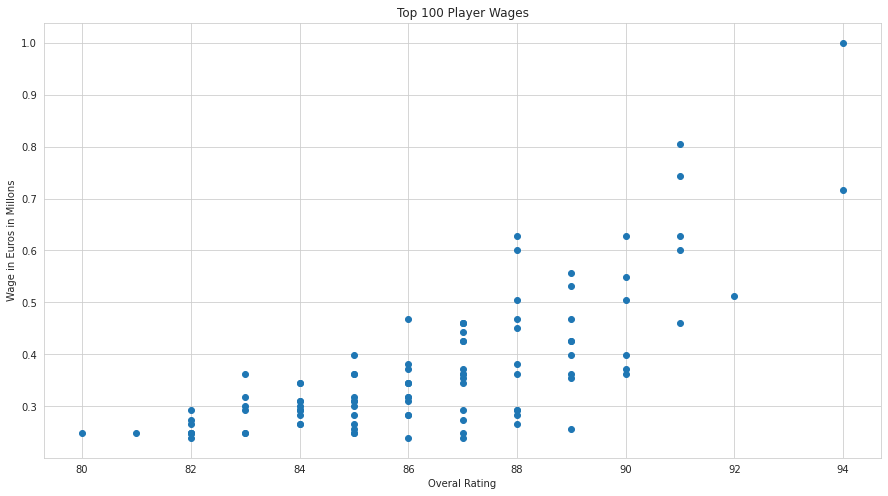

In [ ]:
# sort the dataframe by "wage_euro" in descending order
sorted_labels = df_working.sort_values('wage_euro', ascending=False)

# select the top 100 rows
top_100 = sorted_labels.head(100)
fig1 = plt.subplots(figsize=(15,8))

fig1 =plt.scatter(top_100['overall_rating'], top_100['wage_euro']/scaling_factor_wage)
plt.xlabel('Overal Rating')
plt.ylabel('Wage in Euros in Millons')
plt.title('Top 100 Player Wages')
plt.show()


In [ ]:
# New set to apply ML algoritms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


# extract the features and the target variable
# and drop non-numeric columns in order to apply ML
numeric_cols = df_working.select_dtypes(include=['int', 'float']).columns
df_working_ml = df_working[numeric_cols]

# separe the target value 'Wage_euro' from the dataset
X = df_working_ml.drop('wage_euro', axis=1)
y = df_working_ml['wage_euro']


# preprocess the data by scaling the features
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)


# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=44)

# train the linear regression model
reg = Lasso()
reg.fit(X_train, y_train)

# evaluate the model
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print(f"Train score: {train_score:.2f} %")
print(f"Test score: {test_score:.2f} %")




Train score: 0.77 %
Test score: 0.78 %


We can see that based on actual dataset we got a Trained score of: 0.76 and a test score of 0.80.